In [1]:
import datetime

from Decoder import *
from Finger import *
from LanguageModel import *
from TouchModel import *
from Keyboard import *
from metrics import *
from read_corpus import *
from visualiser import *
from Eye import *
import random
from Executor2 import *
from SpatialMemory import *

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
import sympy as sp
from scipy.stats import entropy

import json
import string
import time
import statistics
from scipy.stats import binned_statistic



Reconstructed object


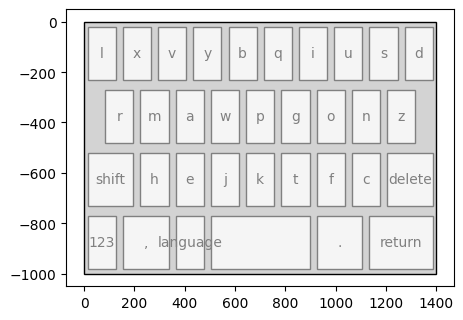

In [2]:
keyboard='qwerty'
mykeyboard = Keyboard('keyboards/'+keyboard+'.xml', 'languagemodel.json', 'touchmodel.json', [1400,1000],[0,0], usedecoder=False, randomise=True)
f=mykeyboard.plot(5)

In [27]:
def decayfunc(x, a, b, c):
    return a * np.exp(-b * x) + c

def powerfunc(x, a, b):
    return a*(x**b)

def logistic_function (x, K, k, x0):
        #P(t) = K / (1 + e^(-k(t-t0)))
        #P(t) is performance at time t
        #K is the upper limit (maximum performance)
        #r is the learning rate
        #t0 is the midpoint time (inflection point)
        return K / (1 + math.e**(-k * (x - x0)))
def linearfunc(x,a,b):
    return a*x+b

e**x = K
ln(K) = x

y=a*e^(-bx)+c
y=a*e

In [116]:
# 8 participants, each participant types 8*12 phrases = 96

f=open('virtual_participants/popts_all.json')
participants = list(json.load(f).keys())
#participants=random.sample(participants, k=1)
print(len(participants))
layout = [2,1]

sessions = 40
session_length_mins = 15
session_limit=session_length_mins*60*1000 #minutes to msec
print(session_limit)

30
900000


In [117]:
def runexp(keyboard, participants):   
    lowercase_alphabet = string.ascii_lowercase

    all_searchtimes=[]
    
    for p in participants:
        total_elapsed = 0
        #load participant
        eye = Eye()
        myfinger=Finger('virtual_participants/popts_all.json', p)
        mykeyboard = Keyboard('keyboards/'+keyboard+'.xml', 'languagemodel.json', 'touchmodel.json', [1400,1000],[0,0], usedecoder=False,
                             randomise=True)
        sm = SpatialMemory(mykeyboard,region_columns=layout[0],region_rows=layout[1], learningRate=0.015, adjustment='dynamic')
        executor = Executor2(myfinger, eye, mykeyboard, sm, expert_factor=0.1)
        executor.memoryUpdateMethod = "logistic"
       
        print (p)

        p_searchtimes = []
        
        for session in range(sessions):
            #session start
            timepassed=0
            attempts=0
            start_time = executor.clock

            #keep presenting targets until timeout
            while timepassed<=session_limit:
                 
                #select random char
                phrase = random.choice(lowercase_alphabet)

                #user looks at the cue - 0.33 chance it is above the kb, .66 chance it is inside
                draw = random.randrange(1,4)
                if draw==1:
                    eye.position = [mykeyboard.xdim/2, mykeyboard.ydim*1.2]
                else:
                    eye.position = [random.randrange(0,mykeyboard.xdim), random.randrange(0,mykeyboard.ydim)]

                #add random buffer (cue presentation time) 2.5-3.5 secs
                executor.clock+=random.randrange(25, 35, 1)/10*1000

                #reset state
                mykeyboard.outputbuffer=[]
                mykeyboard.current_word=[]
                mykeyboard.taps=[]
                
                executor.eye_positions=[]
                
                #print('attempt',phrase,'at', executor.clock/1000)
                taps = executor.typeSentenceWithCorrection2(phrase, speed=1, noticeprob=1, slides='on', completions=False)
                
                timepassed=(executor.clock-start_time)
                #print('attempt time',executor.clock-start_time)
                attempts+=1

            #session ended
            #print(time.strftime('%H:%M:%S', time.gmtime(start_time/1000)),'-', time.strftime('%H:%M:%S', time.gmtime(executor.clock/1000)))
            #print(time.strftime('%H:%M:%S', time.gmtime(timepassed/1000)), timepassed)
            total_elapsed+=timepassed
            #print ("=====")
            #print (session, attempts, timepassed)
            #print ("=====")

            #print(p, session, nblocks, np.mean(session_wpms), np.mean(session_kspcs), sep='\t')

        all_searchtimes.append(executor.key_search_times)
        print('participant end at',time.strftime('%H:%M:%S', time.gmtime(total_elapsed/1000)))
        #print('participant end at',time.strftime('%H:%M:%S', time.gmtime(executor.clock/1000)))
    
        #print(p, np.mean(final_wpms), np.std(final_wpms), sep='\t')

    #run stats
    #print(all_searchtimes)
    #print(executor.spatialMemory.spatialMap)
    print('done')
    return all_searchtimes



In [118]:
ast=runexp('qwerty', participants)

Reconstructed object
101
participant end at 10:01:29
Reconstructed object
104
participant end at 10:01:20
Reconstructed object
105
participant end at 10:01:29
Reconstructed object
106
participant end at 10:01:29
Reconstructed object
107
participant end at 11:12:59
Reconstructed object
108
participant end at 10:01:09
Reconstructed object
109
participant end at 10:01:10
Reconstructed object
110
participant end at 10:16:17
Reconstructed object
111
participant end at 10:02:41
Reconstructed object
112
participant end at 10:01:22
Reconstructed object
113
participant end at 10:01:13
Reconstructed object
114
participant end at 10:01:19
Reconstructed object
115
participant end at 10:01:33
Reconstructed object
116
participant end at 10:01:20
Reconstructed object
117
participant end at 10:01:24
Reconstructed object
118
participant end at 10:01:22
Reconstructed object
120
participant end at 10:01:20
Reconstructed object
121
participant end at 10:01:05
Reconstructed object
122
participant end at 10

35999.5025864742
Bin Edges: [2.75900000e+00 9.02677590e+02 1.80259618e+03 2.70251477e+03
 3.60243336e+03 4.50235195e+03 5.40227054e+03 6.30218913e+03
 7.20210772e+03 8.10202631e+03 9.00194490e+03 9.90186349e+03
 1.08017821e+04 1.17017007e+04 1.26016193e+04 1.35015378e+04
 1.44014564e+04 1.53013750e+04 1.62012936e+04 1.71012122e+04
 1.80011308e+04 1.89010494e+04 1.98009680e+04 2.07008866e+04
 2.16008052e+04 2.25007237e+04 2.34006423e+04 2.43005609e+04
 2.52004795e+04 2.61003981e+04 2.70003167e+04 2.79002353e+04
 2.88001539e+04 2.97000725e+04 3.05999910e+04 3.14999096e+04
 3.23998282e+04 3.32997468e+04 3.41996654e+04 3.50995840e+04
 3.59995026e+04]
Binned Mean: [1.48620365 1.24899063 1.04349069 0.84822084 0.63660893 0.46788214
 0.36104374 0.30207599 0.27015163 0.24340059 0.22809331 0.21667168
 0.20833278 0.2047567  0.20262531 0.20414357 0.20305961 0.20075173
 0.20221031 0.20137706 0.19905883 0.20191562 0.20189455 0.19945006
 0.2012828  0.20407144 0.20178611 0.20030799 0.20028069 0.204035

/Users/ako2/Documents/PythonProjects/venvs/py3.9.4/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


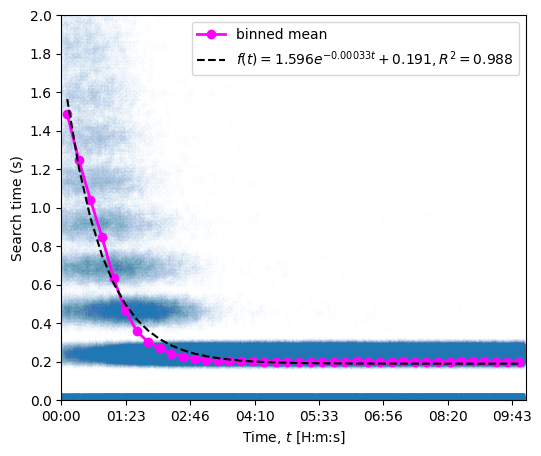

In [119]:
#plot me 

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(6, 5))
axes=[axes]
xdata=[]
ydata=[]


for i in ast:    
    for k in i:
        if k[0]<=sessions*session_length_mins*60*1000:
            xdata.append(k[0]/1000)
            ydata.append(k[1]/1000)
    #print actual session stats
print(max(xdata))
axes[0].set_xlabel(r'Time, $t$ [H:m:s]')
axes[0].set_ylabel(r'Search time (s)')

axes[0].set_ylim(0,2)
axes[0].set_xlim(0,(sessions*session_length_mins+2)*60)

#plot basic data
fmt = ticker.FuncFormatter(lambda x, pos: time.strftime('%H:%M', time.gmtime(x)))
axes[0].xaxis.set_major_formatter(fmt)
#axes[0].xaxis.set_major_locator(plt.MaxNLocator(6))
axes[0].locator_params(axis='both', nbins=10) 
axes[0].scatter(xdata, ydata, marker='+', alpha=0.01)

#plot binned data
num_bins = 40
result = binned_statistic(xdata, ydata, bins=num_bins, statistic='mean')

# Extract bin edges and binned mean from the result
bin_edges = result.bin_edges
bin_means = result.statistic

# Print the result
print("Bin Edges:", bin_edges)
print("Binned Mean:", bin_means)

bin_width = (bin_edges[1] - bin_edges[0])
bin_centers = bin_edges[1:] - bin_width/2
print("Binned Centers:",bin_centers)
#bin_centers= np.array(bin_centers, dtype=np.float128)
#bin_means= np.array(bin_means, dtype=np.float128)
axes[0].plot(bin_centers,bin_means, color='magenta', lw=2,
           label='binned mean', marker='o')


bm=np.array(bin_means, dtype=np.float128)
bc=bm=np.array(bin_centers, dtype=np.float128)
popt=np.array([1.8,0.00035,0.2])
popt, pcov = curve_fit(decayfunc, xdata, ydata, p0=popt, maxfev=2000)
print("decay popt", popt)
popt[2]=abs(popt[2])
y_pred = decayfunc(bc, *popt)
r2=round(r2_score(bin_means, y_pred),3)
popt=np.append(popt,r2)
label="$f(t)=%5.3fe^{-%5.5ft}+%5.3f, R^2=%5.3f$" %tuple(popt)
axes[0].plot(bc, y_pred, label=label, linestyle='dashed', color='black')

axes[0].legend()
plt.show()

In [95]:
jokinen_means=[1.225459689, 1.006506365, 0.875813296, 
               0.829985856, 0.833380481, 0.76039604, 0.762093352, 0.741725601, 0.726449788, 0.695898161]
jokinen_centers=[900, 1800, 2700, 3600, 4500,5400,6300,7200,8100,9000]

In [97]:
jm=np.array(jokinen_means, dtype=np.float128)
jc=bm=np.array(jokinen_centers, dtype=np.float128)
popt=np.array([1.8,0.00035,0.2])
popt, pcov = curve_fit(decayfunc, jc, jm, maxfev=2000)
print("decay popt", popt)
#popt[2]=abs(popt[2])
y_pred = decayfunc(jc, *popt)
r2=round(r2_score(bin_means, y_pred),3)
popt=np.append(popt,r2)
label="BM $f(x)=%5.3fe^{-%5.5fx}+%5.3f, R^2=%5.3f$" %tuple(popt)
print(label)

decay popt [1.         1.         0.84577086]
BM $f(x)=1.000e^{-1.00000x}+0.846, R^2=-2.287$


/var/folders/cq/dpv74_vx6z763s2ht4_54zx1tyht7_/T/ipykernel_62227/1394167862.py:4: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, pcov = curve_fit(decayfunc, jc, jm, maxfev=2000)
